In [221]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [222]:
from google.colab import drive
drive.mount('/content/drive/')                         #mount google drive for the dataset

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [223]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/saved model/Epoch100')

In [230]:
IMG_SIZE = 227
batch_size = 10

CLASS_NAMES = ['ADVE', 'Email', 'Form', 'Letter', 'Memo', 'News', 'Note', 
               'Report', 'Resume', 'Scientific']
TESTDIR = '/content/drive/MyDrive/Colab Notebooks/Testdata'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  TESTDIR,
  #label_mode= 'categorical',
  class_names =CLASS_NAMES,
  image_size=(IMG_SIZE,IMG_SIZE),
  batch_size=batch_size,
  )

Found 2482 files belonging to 10 classes.


In [231]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = loaded_model.evaluate(test_ds, batch_size=10)
print("test loss, test acc:", results)



Evaluate on test data
249/249 [==============================] - 119s 470ms/step - loss: 1.9269 - accuracy: 0.5314
test loss, test acc: [1.9269121885299683, 0.5314262509346008]


In [ ]:
predictions = loaded_model.predict(test_ds)

print("predictions shape:", predictions.shape)

Confusion Matrix:



In [232]:
y_pred = loaded_model.predict(test_ds)

In [233]:
print(y_pred)

[[2.1142918e-05 1.4423122e-01 2.6611952e-04 ... 4.7634420e-04
  9.6758083e-02 5.7121116e-04]
 [9.2606861e-05 3.9093662e-05 1.5851969e-06 ... 8.5921168e-01
  1.0304326e-04 1.0168129e-01]
 [1.0313261e-04 3.9620770e-04 9.3386948e-01 ... 3.1210876e-03
  5.8726698e-02 1.8984128e-03]
 ...
 [2.4467576e-05 9.4199911e-02 4.6039662e-05 ... 8.0367613e-01
  8.7171309e-03 2.5905587e-03]
 [3.3332201e-04 1.0974966e-03 3.6098164e-01 ... 1.5061506e-03
  3.4836598e-02 2.5216194e-03]
 [9.6702221e-05 2.1165825e-04 6.0019382e-05 ... 8.3357684e-02
  1.3155540e-03 8.9097142e-01]]


In [234]:
p = np.argmax(y_pred, axis=1)

In [236]:
y_true = np.concatenate([y for x, y in test_ds], axis=0)

In [238]:
print(len(y_true))

2482


In [196]:
#l = np.argmax(y_true, axis = 1)
#print (l)

[1 3 4 ... 3 1 3]


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc3096d4cf8>)

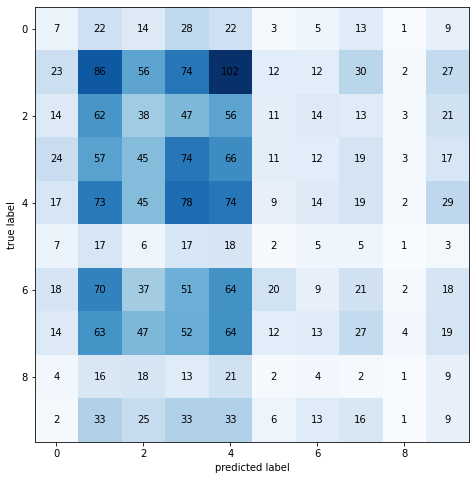

In [240]:
mat = confusion_matrix(p,y_true)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8))

In [241]:
 accuracy_score(p,l)

0.12248186946011282

In [ ]:
cr=[]
for i, (image, label) in enumerate(test_ds):
                        cr.append(CL[label.numpy()[0]])

TypeError: ignored

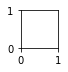

In [208]:

for i, (image, label) in enumerate(test_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CL[label.numpy()[0]])
    plt.axis('off')

<Figure size 432x288 with 0 Axes>

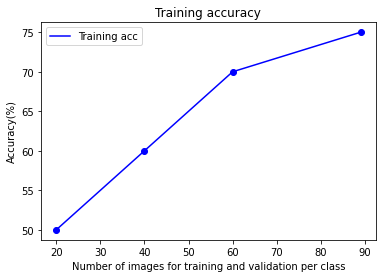

<Figure size 432x288 with 0 Axes>

In [220]:
trainsize = [20,40,60,89]
acc = [50,60,70,75]

plt.plot(trainsize, acc,'b-',label='Training acc')
plt.plot(trainsize,acc,'bo')
plt.axis('auto')
plt.title('Training accuracy')
plt.xlabel('Number of images for training and validation per class')
plt.ylabel('Accuracy(%)')
plt.legend()

plt.figure()

In [244]:
y_preds = loaded_model.predict(test_ds)
predicted_categories = tf.argmax(y_preds, axis=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
matrix(predicted_categories, true_categories)
plot_confusion_matrix(conf_mat=matrix, figsize=(8,8))

NameError: ignored